# Sentiment Based Product Recommendation System

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.
 
With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.
 
As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 
 
In order to do this, you planned to build a sentiment-based product recommendation system

Heroku URL : https://sbprs-sravan-patsa.herokuapp.com

## 1. Data sourcing and sentiment analysis

### Exploratory data analysis

In [220]:
# import necessary libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [221]:
# read the csv file
df = pd.read_csv("sample30.csv")

In [222]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [223]:
df.shape

(30000, 15)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [225]:
df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [226]:
df.nunique()

id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

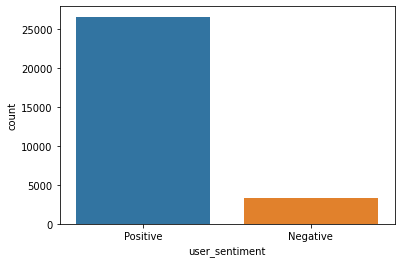

In [228]:
# distribution of user Sentiment
sns.countplot(x="user_sentiment", data = df)
plt.show()

In [229]:
df.user_sentiment.value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

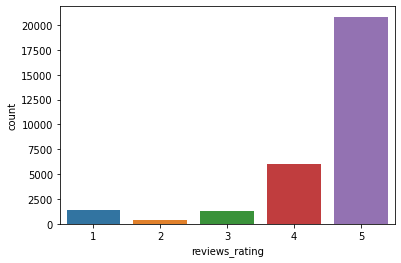

In [230]:
# distribution of Product Ratings
sns.countplot(x="reviews_rating", data = df)
plt.show()

In [231]:
df.reviews_rating.value_counts().sort_index()

1     1384
2      420
3     1345
4     6020
5    20831
Name: reviews_rating, dtype: int64

In [232]:
# Reviews with rating eqaul to or above 3
df.reviews_rating[df.reviews_rating>=3].value_counts().sum()

28196

In [233]:
# Reviews with rating below 3
df.reviews_rating[df.reviews_rating<3].value_counts().sum()

1804

#### There is some issue with the sentiment of some reviews where reviews with rating below 3 are shown as Postive

In [234]:
df.loc[(df.reviews_rating<3) & (df.user_sentiment == "Positive")]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,False,1,Got as a surprise for my husband there is noth...,Don't buy,NaN,NaN,moore222,Positive
11,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-05T00:00:00.000Z,False,False,1,Purchased this thinking it would have some sor...,Waste of Money,NaN,NaN,bre234,Positive
14,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-09T00:00:00.000Z,False,False,1,First time purchase of this type of product. M...,Disappointed,NaN,NaN,nicole,Positive
54,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2014-09-01T00:00:00.000Z,False,False,1,I used (and loved) this product for several ye...,New formula is terrible,NaN,NaN,alnscoob97,Positive
56,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2014-09-07T00:00:00.000Z,False,False,1,I am so disappointed! I have used this product...,Please bring back the old formula,NaN,NaN,jacmary,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28869,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-30T19:52:26.000Z,NaN,NaN,2,This was the last step out of the three step p...,Last Step!,Birmingham,NaN,mmrowell,Positive
28870,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-28T03:48:36.000Z,NaN,NaN,2,"I have been a big LOral fan, using their produ...","Unfortunately, Not For My Hair",NaN,NaN,rally16,Positive
28871,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T03:35:19.000Z,NaN,NaN,2,Despite using this with the line's hair mask a...,I Really Wanted To Love This But...,Norfolk,VA,swess12,Positive
28872,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T07:14:35.000Z,NaN,NaN,2,I tried out this whole set.i wanted it to work...,Just Not For Me,NaN,NaN,spov,Positive


In [235]:
# Updating the sentiment as Negative for the reviews with rating below 3
df['user_sentiment'] = np.where(df['reviews_rating']<3, "Negative", "Positive")

In [236]:
df.loc[(df.reviews_rating<3) & (df.user_sentiment == "Positive")]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment


In [237]:
df.user_sentiment.value_counts()

Positive    28196
Negative     1804
Name: user_sentiment, dtype: int64

### Data cleaning


In [238]:
# Checking for columns with null values
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              0
dtype: int64

In [239]:
#Checking for duplicate rows
df.duplicated().any()

False

#### Remove rows with null values in reviews_username and user_sentiment

In [240]:
df['user_sentiment'].isnull().sum()

0

In [241]:
df.dropna(subset=['user_sentiment'], inplace=True)
df['user_sentiment'].isnull().sum()

0

In [242]:
df['reviews_username'].isnull().sum()

63

In [243]:
df.dropna(subset=['reviews_username'], inplace=True)
df['reviews_username'].isnull().sum()

0

In [244]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14006
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title             189
reviews_userCity        28037
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
dtype: int64

In [245]:
# Concatinating review title and text into a single feature
df['reviews'] = df["reviews_title"].fillna("") + " " + df["reviews_text"]

In [246]:
df['reviews'][0]

"Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29937 non-null  object
 1   brand                 29937 non-null  object
 2   categories            29937 non-null  object
 3   manufacturer          29796 non-null  object
 4   name                  29937 non-null  object
 5   reviews_date          29897 non-null  object
 6   reviews_didPurchase   15931 non-null  object
 7   reviews_doRecommend   27396 non-null  object
 8   reviews_rating        29937 non-null  int64 
 9   reviews_text          29937 non-null  object
 10  reviews_title         29748 non-null  object
 11  reviews_userCity      1900 non-null   object
 12  reviews_userProvince  167 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29937 non-null  object
 15  reviews               29937 non-null

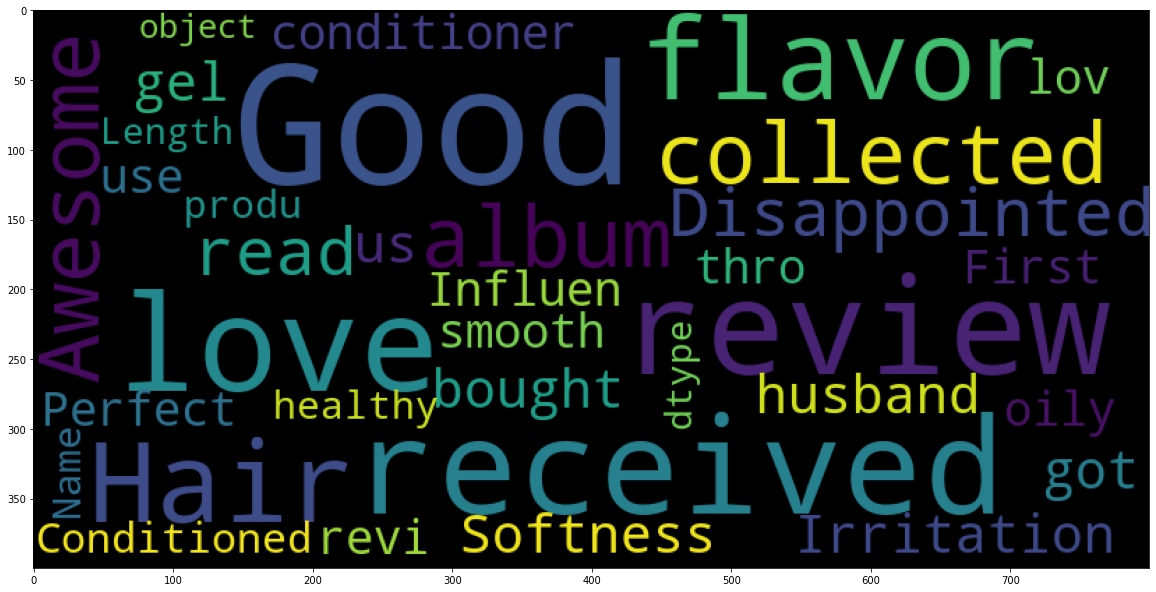

In [248]:
# Wordcloud of the most frequent words
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_words = 300,
                      stopwords=stopwords,
                      max_font_size=60,
                      random_state= 1,
                     scale = 2).generate(str(df['reviews']))
plt.figure(figsize=[20,20])
plt.imshow(wordcloud)
plt.show()

In [249]:
# Removing negative words from the stopwords list to predict Negative Sentiment statments correctly
# If not removed Negative reviews are predicted as postive reviews
from nltk.corpus import stopwords
non_negative_stopwords = set(stopwords.words('english')) - {"no", "not", "never", "nothing", "neither", "none", "nowhere", "doesn't", "don't", "can't", "won't", "isn't", "wasn't", "shouldn't", "wouldn't", "couldn't"}


In [250]:
# Function to clean the reviews
import re, nltk, spacy, string
def cleaner(text):
    # Make the text lowercase
    text = text.lower()
    # Remove punctuation using regex
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers using regex
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove stopwords (exclude the negative words)
    text = [word for word in text.split(" ") if word not in non_negative_stopwords]
    text = ' '.join(text)
    
    return text
    

In [251]:
# Cleaning the reviews
df['clean_reviews'] = df['reviews'].apply(cleaner)

df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,disappointed read reviews looking buying one c...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband bought gel us gel caused ir...


In [252]:
df.sample(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews
28033,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2015-12-04T00:00:00.000Z,NaN,True,5,But the video for my grandson who loves planes...,Love ut,NaN,NaN,leo1165,Positive,Love ut But the video for my grandson who love...,love ut video grandson loves planes really enj...
7946,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-25T23:23:58.000Z,NaN,True,5,I love the cleaning feeling when I use Clorox ...,Amazing,NaN,NaN,ni2ki,Positive,Amazing I love the cleaning feeling when I use...,amazing love cleaning feeling use clorox clean...
5565,AVpf0YhQLJeJML43ETff,Australian Gold,"Personal Care,Sun Care,Sunscreen Below SPF 15,...",AUSTRALIAN GOLD PRODUCTS LTD.,"Australian Gold Exotic Blend Lotion, SPF 4",2014-08-21T00:00:00.000Z,True,True,5,We love this lotion! The best smelling lotion ...,Our Favorite Suntan Lotion,NaN,NaN,dboz,Positive,Our Favorite Suntan Lotion We love this lotion...,favorite suntan lotion love lotion best smelli...
17396,AVpfazX31cnluZ0-kbdl,Just For Men,"Personal Care,Hair Care,Hair Color And Bleachi...",Combe Incorporated,Just For Men Touch Of Gray Gray Hair Treatment...,2012-08-16T00:00:00.000Z,False,True,4,After 4 weeks it leaves a a slight brownish co...,Woud recommend.,NaN,NaN,chas17,Positive,Woud recommend. After 4 weeks it leaves a a sl...,woud recommend weeks leaves slight brownish c...
6498,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-04T00:00:00.000Z,False,False,2,great product I use it all the time. I like th...,good,NaN,NaN,tia789,Negative,good great product I use it all the time. I li...,good great product use time like lemon scent b...
3604,AVpe6n2_LJeJML43yOgE,TRESemme,"Personal Care,Hair Care,Conditioner,Conditione...",Tresemme,Tresemme Kertatin Smooth Infusing Conditioning,2013-12-27T00:00:00.000Z,True,False,4,The product is great but it leaked during ship...,Nice item,NaN,NaN,whosethat,Positive,Nice item The product is great but it leaked d...,nice item product great leaked shipping mess b...
11865,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-04-13T00:00:00.000Z,False,True,5,These are so great to use in the kitchen to wi...,Love these in my kitchen,NaN,NaN,vallink,Positive,Love these in my kitchen These are so great to...,love kitchen great use kitchen wipe everything...
5701,AVpf2tw1ilAPnD_xjflC,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh...",Summit Entertainment,Red (special Edition) (dvdvideo),2015-03-15T00:00:00.000Z,NaN,True,4,Lots of action in this movie. Great stars and ...,Lots of Action,NaN,NaN,randy,Positive,Lots of Action Lots of action in this movie. G...,lots action lots action movie great stars fun ...
19070,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-22T00:00:00.000Z,False,True,5,I would recommend this product to anyone. They...,I love this product,NaN,NaN,kara,Positive,I love this product I would recommend this pro...,love product would recommend product anyone th...
23782,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-09-23T00:00:00.000Z,NaN,True,4,Godzilla's return to the big screen is a fun r...,The King returns!!!,NaN,NaN,azrael4854,Positive,The King returns!!! Godzilla's return to the b...,king returns godzillas return big screen fun r...


In [254]:
# code for getting lemmatized reviews

import time
start_time = time.time()

lemma_model = spacy.load('en_core_web_sm', exclude=['ner'])

lemma = []

for doc in lemma_model.pipe(df['clean_reviews'].values, n_process=-1):
    if doc.has_annotation('DEP'):
        lemma_list = [token.lemma_ for token in doc]
        lemma.append(" ".join(lemma_list))
    else:
        lemma.append(None)
        
Time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(Time_elapsed))

Time Taken: 62.08 seconds


In [255]:
df['reviews_lemmatized'] = lemma

In [256]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews,reviews_lemmatized
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good Good flavor. This review was collected as...,good good flavor review collected part promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good Good flavor.,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,Disappointed I read through the reviews on her...,disappointed read reviews looking buying one c...,disappointed read review look buy one couple l...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,Irritation My husband bought this gel for us. ...,irritation husband bought gel us gel caused ir...,irritation husband buy gel we gel cause irrita...


In [257]:
#code to find the top 30 unigram frequency
unigrams_list = df['reviews_lemmatized'].apply(lambda sentence: list(nltk.ngrams(sentence.split(),1)))
unigrams = [item[0] for sublist in unigrams_list for item in sublist]
unigrams_freq = nltk.FreqDist(unigrams)

print('WORD : FREQ')
for word, freq in unigrams_freq.most_common(30):
  print(f'{word} : {freq}')

WORD : FREQ
great : 15021
use : 13668
love : 13034
product : 12735
not : 11933
movie : 10887
review : 9482
good : 9344
part : 9192
collect : 8769
promotion : 8746
wipe : 8330
clean : 7938
clorox : 6010
like : 5285
hair : 4882
well : 4734
smell : 4577
easy : 4316
one : 4062
make : 4037
do : 3976
get : 3688
work : 3406
really : 2937
time : 2905
would : 2817
godzilla : 2767
feel : 2711
buy : 2675


In [258]:
#code to find the top 30 bigram frequency
bigrams_list = df['reviews_lemmatized'].apply(lambda sentence: list(nltk.ngrams(sentence.split(),2)))
bigrams = [item[0] + ' ' + item[1] for sublist in bigrams_list for item in sublist]
bigrams_freq = nltk.FreqDist(bigrams)

print('WORD : FREQ')
for word, freq in bigrams_freq.most_common(30):
  print(f'{word} : {freq}')

WORD : FREQ
review collect : 8741
collect part : 8741
part promotion : 8741
do not : 3067
clorox wipe : 2832
great product : 1999
great movie : 1761
easy use : 1568
I m : 1319
I ve : 1275
love clorox : 1215
love product : 1171
can not : 1085
use clorox : 1084
good movie : 1054
use product : 941
bring back : 849
smell great : 831
love love : 814
disinfecting wipe : 813
product use : 806
movie great : 784
love use : 737
be not : 720
work great : 706
love movie : 654
love wipe : 649
product love : 647
use wipe : 589
lip shimmer : 579


In [259]:
# code to find the top 30 trigram frequency
trigrams_list = df['reviews_lemmatized'].apply(lambda sentence: list(nltk.ngrams(sentence.split(),3)))
trigrams = [item[0] + ' ' + item[1] + ' ' + item[2] for sublist in trigrams_list for item in sublist]
trigrams_freq = nltk.FreqDist(trigrams)

print('WORD : FREQ')
for word, freq in trigrams_freq.most_common(30):
  print(f'{word} : {freq}')

WORD : FREQ
review collect part : 8741
collect part promotion : 8741
love clorox wipe : 603
clorox disinfecting wipe : 555
use clorox wipe : 551
please bring back : 434
product review collect : 401
I ve use : 373
clean review collect : 361
bring back old : 303
use review collect : 295
great product love : 287
great movie great : 262
clorox wipe love : 249
opinion review collect : 247
love use clorox : 246
back old formula : 235
movie great movie : 235
receive product free : 226
wipe easy use : 224
do not like : 223
great product use : 222
love love love : 219
product easy use : 213
get job do : 207
testing purpose opinion : 183
great review collect : 182
not live without : 180
can not wait : 177
great product great : 173


In [260]:
# reset index
df.reset_index(inplace = True, drop = True)

In [261]:
df["user_sentiment"].value_counts()

Positive    28146
Negative     1791
Name: user_sentiment, dtype: int64

In [262]:
# Mapping the Review Sentiment to 1 and 0
df["sentiment"] = df["user_sentiment"].apply(lambda x : 1 if x == 'Positive' else 0)

In [263]:
df["sentiment"].value_counts()

1    28146
0     1791
Name: sentiment, dtype: int64

In [264]:
df.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews,reviews_lemmatized,sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,awesome love album good hip hop side current p...,1


### TF-IDF vectorizer

In [265]:
#initialise the TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    ngram_range = (1, 3),
    stop_words = non_negative_stopwords,
    min_df=2,
    max_df=0.95)

#create the Document Term Matrix
tfidf_df = tfidf.fit_transform(df['reviews_lemmatized'])

In [266]:
tfidf_df

<29937x136923 sparse matrix of type '<class 'numpy.float64'>'
	with 1141327 stored elements in Compressed Sparse Row format>

In [267]:
# pickle file - tfidf vectorizer
import pickle
filename = "tfidf.pkl"
with open(filename, 'wb') as file:
    pickle.dump(tfidf, file)

### Train-Test split

In [268]:
# Split train and test data in 80 to 20 percent
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['sentiment'], test_size = 0.2, random_state = 40)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (23949, 136923)
Shape of y_train: (23949,)
Shape of X_test: (5988, 136923)
Shape of y_test: (5988,)


In [269]:
y_train.value_counts()

1    22528
0     1421
Name: sentiment, dtype: int64

In [270]:
y_test.value_counts()

1    5618
0     370
Name: sentiment, dtype: int64

## 2. Model building

### Logistic Regression without SMOTE

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix, recall_score, precision_score

In [272]:
# Function to print evaluation metrics of ML models
def eval_metrics(truth, predicted):
    print('Accuracy : ', accuracy_score(truth, predicted))
    print('Weighted F1 score : ', f1_score(truth, predicted, average="weighted"))
    print('Recall : ', recall_score(truth, predicted))
    print('Precision : ', precision_score(truth, predicted),'\n')
    print('Confusion Matrix : \n',confusion_matrix(predicted, truth),'\n')
    print('Classification Report : \n', classification_report(truth, predicted))

In [273]:
# Logistic Regression with default parameters
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [274]:
# Prediction and f1-score of Logistic Regression model
y_pred_lr = lr.predict(X_test)
f1_score(y_test, y_pred_lr, average="weighted")

0.9585887018739445

In [275]:
# Evaluation metrics of Logistic Regression model 
eval_metrics(y_test, y_pred_lr)

Accuracy :  0.9647628590514362
Weighted F1 score :  0.9585887018739445
Recall :  0.9989320042719829
Precision :  0.9647584665635207 

Confusion Matrix : 
 [[ 165    6]
 [ 205 5612]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.45      0.61       370
           1       0.96      1.00      0.98      5618

    accuracy                           0.96      5988
   macro avg       0.96      0.72      0.80      5988
weighted avg       0.96      0.96      0.96      5988



### SMOTE

In [276]:
# Using SMOTE to handle class imbalance data as there are more number of postive sentiments than negative sentiments
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [277]:
y_train.value_counts()

1    22528
0     1421
Name: sentiment, dtype: int64

In [278]:
y_train_sm.value_counts()

1    22528
0    22528
Name: sentiment, dtype: int64

### Logistic Regression with SMOTE

In [279]:
# Fitting of Logistic Regression model on SMOTE data
lr_sm = LogisticRegression(random_state=40)
lr_sm.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=40)

In [280]:
# Improved f1-score after using SMOTE data
y_pred_lr_sm = lr_sm.predict(X_test)
f1_score(y_test, y_pred_lr_sm, average="weighted")

0.967367485700335

In [281]:
# Evaluation metrics of Logistic Regression model after using SMOTE data
eval_metrics(y_test, y_pred_lr_sm)

Accuracy :  0.9659318637274549
Weighted F1 score :  0.967367485700335
Recall :  0.9752580989676042
Precision :  0.9882756132756133 

Confusion Matrix : 
 [[ 305  139]
 [  65 5479]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       370
           1       0.99      0.98      0.98      5618

    accuracy                           0.97      5988
   macro avg       0.84      0.90      0.87      5988
weighted avg       0.97      0.97      0.97      5988



### Hyperparameter Tuning - Logistic Regression with SMOTE

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
# Hyperparameter Tuning of Logistic Regression model
solvers = ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga']
penalty = ['l1', 'l2','elasticnet', 'none']
c_values = [100, 50, 10, 5, 3, 2, 1, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values, penalty=penalty)
grid_search = GridSearchCV(estimator=lr_sm, param_grid=grid, n_jobs=-1, cv=5, scoring='f1_weighted')
grid_result = grid_search.fit(X_train_sm, y_train_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/sravanpatsa/miniforge3/lib/p

Best: 0.996182 using {'C': 100, 'penalty': 'none', 'solver': 'sag'}


In [284]:
# Improved f1-score after tuning the hyperparameters

logistic_best = grid_result.best_estimator_
y_pred_lr_tuned = logistic_best.predict(X_test)
f1_score(y_test, y_pred_lr_tuned, average="weighted")

0.975993372579379

In [285]:
# Evaluation metrics of Logistic Regression model after using SMOTE data and tuning the hyperparameters

eval_metrics(y_test, y_pred_lr_tuned)

Accuracy :  0.9766199064796259
Weighted F1 score :  0.975993372579379
Recall :  0.9911000355998576
Precision :  0.9840933191940615 

Confusion Matrix : 
 [[ 280   50]
 [  90 5568]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       370
           1       0.98      0.99      0.99      5618

    accuracy                           0.98      5988
   macro avg       0.92      0.87      0.89      5988
weighted avg       0.98      0.98      0.98      5988



### Accuracy :  0.9766199064796259
### Weighted F1 score :  0.975993372579379
### Recall :  0.9911000355998576
### Precision :  0.9840933191940615 

### Logistic Regression model is the best performing model

In [286]:
# pickle file - logistic regression model
filename = "logistic_regression_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(logistic_best, file)

### XGBoost without SMOTE

In [139]:
#import libraries
import xgboost as xgb

In [140]:
xgb_model = xgb.XGBClassifier(n_jobs = -1)

In [141]:
# training xgboost model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [142]:
# prediction using xgboost model
y_pred_xgb = xgb_model.predict(X_test)
f1_score(y_test, y_pred_xgb, average="weighted")

0.9704843947992464

In [143]:
# Evaluation metrics of xgboost model

eval_metrics(y_test, y_pred_xgb)

Accuracy :  0.9724448897795591
Weighted F1 score :  0.9704843947992464
Recall :  0.9939480242079032
Precision :  0.9770778652668416 

Confusion Matrix : 
 [[ 239   34]
 [ 131 5584]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.65      0.74       370
           1       0.98      0.99      0.99      5618

    accuracy                           0.97      5988
   macro avg       0.93      0.82      0.86      5988
weighted avg       0.97      0.97      0.97      5988



### XGBoost with SMOTE

In [144]:
# f1 score of xgboost model has decreased after using SMOTE data
xgb_sm = xgb.XGBClassifier(n_jobs = -1)
xgb_sm.fit(X_train_sm, y_train_sm)
y_pred_xgb_sm = xgb_sm.predict(X_test)
f1_score(y_test, y_pred_xgb_sm, average="weighted")

0.9655978623914495

In [145]:
# Evaluation metrics of xgboost model after using SMOTE data

eval_metrics(y_test, y_pred_xgb_sm)

Accuracy :  0.9655978623914495
Weighted F1 score :  0.9655978623914495
Recall :  0.9816660733357067
Precision :  0.9816660733357067 

Confusion Matrix : 
 [[ 267  103]
 [ 103 5515]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       370
           1       0.98      0.98      0.98      5618

    accuracy                           0.97      5988
   macro avg       0.85      0.85      0.85      5988
weighted avg       0.97      0.97      0.97      5988



### Hyperparameter Tuning - XGBoost without SMOTE

In [146]:
# Hyperparameter tuning XGBoost model using GridSearchCV
param_grid = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}      

# specify model
model = xgb.XGBClassifier(max_depth=2, n_estimators=200,n_jobs = -1, eval_metric='logloss')

# set up GridSearchCV()
xgb_grid_search = GridSearchCV(estimator = model, param_grid = param_grid,scoring= 'f1_weighted',
                        cv = 5,n_jobs = -1,verbose=1, return_train_score=True)


In [147]:
xgb_grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     m...
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'subsample': [0.3, 0.4, 0.5]},
             return_train_score=True, scoring='f1_weighted', verbose=1)

In [148]:
xgb_grid_search.best_params_

{'learning_rate': 0.3, 'subsample': 0.4}

In [150]:
#f1 score is still lower than the logistic regression model

y_pred_xgb_tuned = xgb_grid_search.best_estimator_.predict(X_test)
f1_score(y_test, y_pred_xgb_tuned, average="weighted")

0.9698510814320415

In [151]:
# Evaluation metrics of xgboost model after tuning the hyperparameters
eval_metrics(y_test, y_pred_xgb_tuned)

Accuracy :  0.9716098864395457
Weighted F1 score :  0.9698510814320415
Recall :  0.9925240299038803
Precision :  0.9775596072931276 

Confusion Matrix : 
 [[ 242   42]
 [ 128 5576]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.65      0.74       370
           1       0.98      0.99      0.98      5618

    accuracy                           0.97      5988
   macro avg       0.91      0.82      0.86      5988
weighted avg       0.97      0.97      0.97      5988



### Random Forest Classifier without SMOTE

In [152]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=40)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [153]:
y_pred_rf = rf.predict(X_test)
f1_score(y_test, y_pred_rf, average="weighted")

0.9632751835446104

In [154]:
# Evaluation metrics of Random Forest Classifier
eval_metrics(y_test, y_pred_rf)

Accuracy :  0.9682698730794923
Weighted F1 score :  0.9632751835446104
Recall :  0.9994660021359915
Precision :  0.9677697345742847 

Confusion Matrix : 
 [[ 183    3]
 [ 187 5615]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.49      0.66       370
           1       0.97      1.00      0.98      5618

    accuracy                           0.97      5988
   macro avg       0.98      0.75      0.82      5988
weighted avg       0.97      0.97      0.96      5988



### Random Forest Classifier with SMOTE

In [58]:
# Random Forest Classifier
rf_sm = RandomForestClassifier(random_state=40)
rf_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=40)

In [59]:
# f1 score is slightly higher after using SMOTE data
y_pred_rf_sm = rf_sm.predict(X_test)
f1_score(y_test, y_pred_rf_sm, average="weighted")

0.9664986428903383

In [60]:
# Evaluation metrics of Random Forest Classifier after using SMOTE data
eval_metrics(y_test, y_pred_rf_sm)

Accuracy :  0.969939879759519
Weighted F1 score :  0.9664986428903383
Recall :  0.9967960128159488
Precision :  0.9718847622353349 

Confusion Matrix : 
 [[ 208   18]
 [ 162 5600]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.56      0.70       370
           1       0.97      1.00      0.98      5618

    accuracy                           0.97      5988
   macro avg       0.95      0.78      0.84      5988
weighted avg       0.97      0.97      0.97      5988



### Hyperparameter Tuning - Random Forest Classifier with SMOTE

In [61]:
# Hyperparameter Tuning

n_estimators = np.arange(100, 1000, 50)
max_features = ['None','sqrt', 'log2', 'auto']
max_depth= [5, 10, 25, 50, 100, 500, None]

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
grid_search = GridSearchCV(estimator=rf_sm, param_grid=grid, n_jobs=-1, cv=5, scoring='f1_weighted')

start_time = time.time()

grid_result = grid_search.fit(X_train_sm, y_train_sm)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

time_elapsed = time.time() - start_time
print('Time elapsed: {:.2f} seconds'.format(time_elapsed))


/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/sravanpatsa/miniforge3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

Best: 0.997536 using {'max_depth': None, 'max_features': 'log2', 'n_estimators': 650}
Time elapsed: 72407.61 seconds


In [62]:
# no improvment in f1 score
rf_best = grid_result.best_estimator_
y_pred_rf_tuned = rf_best.predict(X_test)
f1_score(y_test, y_pred_rf_tuned, average="weighted")

0.962198443557819

In [63]:
# Evaluation metrics of Random Forest Classifier after using SMOTE data and tuning the hyperparameters

eval_metrics(y_test, y_pred_rf_tuned)

Accuracy :  0.9676018704074816
Weighted F1 score :  0.962198443557819
Recall :  0.9998220007119971
Precision :  0.9667814113597246 

Confusion Matrix : 
 [[ 177    1]
 [ 193 5617]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.48      0.65       370
           1       0.97      1.00      0.98      5618

    accuracy                           0.97      5988
   macro avg       0.98      0.74      0.81      5988
weighted avg       0.97      0.97      0.96      5988



### Naive Bayes without SMOTE

In [65]:
# Naive Bayes

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [66]:
# f1 score is lower than other models
y_pred_nb = nb.predict(X_test)
f1_score(y_test, y_pred_nb, average="weighted")

0.9472049469095576

In [67]:
# Evaluation metrics of Naive Bayes model

eval_metrics(y_test, y_pred_nb)

Accuracy :  0.9574148296593187
Weighted F1 score :  0.9472049469095576
Recall :  0.9992880028479886
Precision :  0.9572037510656437 

Confusion Matrix : 
 [[ 119    4]
 [ 251 5614]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.32      0.48       370
           1       0.96      1.00      0.98      5618

    accuracy                           0.96      5988
   macro avg       0.96      0.66      0.73      5988
weighted avg       0.96      0.96      0.95      5988



### Naive Bayes with SMOTE

In [68]:
# Naive Bayes

nb_sm = MultinomialNB()
nb_sm.fit(X_train_sm, y_train_sm)

MultinomialNB()

In [69]:
# no improvment after using smote data
y_pred_nb_sm = nb_sm.predict(X_test)
f1_score(y_test, y_pred_nb_sm, average="weighted")

0.9479651873510457

In [70]:
# Evaluation metrics of Naive Bayes model after using SMOTE data

eval_metrics(y_test, y_pred_nb_sm)

Accuracy :  0.9407147628590514
Weighted F1 score :  0.9479651873510457
Recall :  0.9441082235671058
Precision :  0.9923292797006548 

Confusion Matrix : 
 [[ 329  314]
 [  41 5304]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.51      0.89      0.65       370
           1       0.99      0.94      0.97      5618

    accuracy                           0.94      5988
   macro avg       0.75      0.92      0.81      5988
weighted avg       0.96      0.94      0.95      5988



### Hyperparameter Tuning - Naive Bayes without SMOTE

In [71]:
# Hyperparameter Tuning

alpha = (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
fit_prior = [True, False]
# define grid search
grid = dict(alpha=alpha,fit_prior=fit_prior)
grid_search = GridSearchCV(estimator=nb, param_grid=grid, n_jobs=-1, cv=5, scoring='f1_weighted')
start_time = time.time()
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

time_elapsed = time.time() - start_time
print('Time elapsed: {:.2f} seconds'.format(time_elapsed))

Best: 0.965019 using {'alpha': 1e-05, 'fit_prior': True}
Time elapsed: 2.67 seconds


In [72]:
# Slight improvment in f1 score after tuning the model but still lower than logistic regression model
nb_best = grid_result.best_estimator_
y_pred_nb_tuned = nb_best.predict(X_test)
f1_score(y_test, y_pred_nb_tuned, average="weighted")

0.9655780997025545

In [73]:
# Evaluation metrics of Naive Bayes model after tuning the hyperparameters

eval_metrics(y_test, y_pred_nb_tuned)

Accuracy :  0.968436873747495
Weighted F1 score :  0.9655780997025545
Recall :  0.9937700249199003
Precision :  0.9731567021091163 

Confusion Matrix : 
 [[ 216   35]
 [ 154 5583]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.58      0.70       370
           1       0.97      0.99      0.98      5618

    accuracy                           0.97      5988
   macro avg       0.92      0.79      0.84      5988
weighted avg       0.97      0.97      0.97      5988



### Logistic regression has performed the best out of all ML models with higher accuracy, f1 score and other metrics as well

## 3. Recommendation System

In [287]:
df.shape

(29937, 19)

In [288]:
df.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews,reviews_lemmatized,sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,awesome love album good hip hop side current p...,1


In [289]:
# Test and Train split of the dataset.

train, test = train_test_split(df, test_size=0.20, random_state=40)

In [290]:
print(train.shape)
print(test.shape)

(23949, 19)
(5988, 19)


In [291]:
# Pivot the train dataset into matrix format in which columns are products and the rows are users.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
df_pivot.shape

(20510, 255)

### Creating dummy train dataset

In [293]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [294]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [295]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [296]:
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User based recommendation

In [297]:
from sklearn.metrics.pairwise import pairwise_distances

# creating the user similarity matrix using paiwise distance functions
user_correlation = 1 - pairwise_distances(df_pivot, metric = 'cosine')
user_correlation[np.isnan(user_correlation)] = 0

user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [298]:
user_correlation.shape

(20510, 20510)

In [299]:
# Removing negatively correlated values
user_correlation[user_correlation < 0] = 0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [300]:
# Prediction of ratings already rated
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.19518001, 2.31179974,
        0.54410719],
       [0.        , 0.        , 2.0519567 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.0519567 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.43033148, ..., 3.53553391, 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 0.        , 2.43685089,
        0.57353933],
       [0.        , 0.        , 0.43033148, ..., 3.53553391, 0.        ,
        2.88675135]])

In [306]:
# Prediction of ratings which are not rated yet in train dataset
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,17.483400,0.0,0.0,0.494535,0.440415,0.367057,0.0,...,0.397061,0.0,0.000000,0.0,1.962868,0.0,0.828742,0.195180,2.3118,0.544107
01impala,0.0,0.0,2.051957,22.589124,0.0,0.0,0.000000,2.353158,0.000000,0.0,...,1.434992,0.0,0.000000,0.0,1.520114,0.0,0.000000,0.000000,0.0000,0.000000
02dakota,0.0,0.0,2.051957,22.589124,0.0,0.0,0.000000,2.353158,0.000000,0.0,...,1.434992,0.0,0.000000,0.0,1.520114,0.0,0.000000,0.000000,0.0000,0.000000
0325home,0.0,0.0,0.430331,7.372059,0.0,0.0,2.886751,6.937603,1.934558,0.0,...,0.000000,0.0,3.535534,0.0,0.000000,0.0,2.096570,3.535534,0.0000,2.886751
08dallas,0.0,0.0,0.000000,0.375823,0.0,0.0,0.000000,0.000000,1.547646,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000


### Top 20 recommendation for the user

In [307]:
# Take the user ID as input.
user_input = input("Enter your user name : ")
print(user_input)

Enter your user name : 00sab00
00sab00


In [308]:
# Top 20 recommendations for the given user
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
AVpfPaoqLJeJML435Xk9    123.985502
AVpfRTh1ilAPnD_xYic2     81.348332
AVpf0eb2LJeJML43EVSt     54.742455
AVpf3VOfilAPnD_xjpun     44.947656
AVpf2tw1ilAPnD_xjflC     27.983080
AVpfJP1C1cnluZ0-e3Xy     24.205001
AVpfM_ytilAPnD_xXIJb     20.491677
AVpf63aJLJeJML43F__Q     19.223686
AVpf5olc1cnluZ0-tPrO     18.134661
AV1YGDqsGV-KLJ3adc-O     17.483400
AVpf385g1cnluZ0-s0_t     15.730849
AVpfR5m0LJeJML436K3W     13.958505
AVpe31o71cnluZ0-YrSD     12.378552
AVpfOIrkilAPnD_xXgDG      8.426881
AVpfov9TLJeJML43A7B0      8.003328
AVpfBrUZilAPnD_xTUly      6.806430
AVpe6FfKilAPnD_xQmHi      6.312694
AVpfN6Z71cnluZ0-gZmO      6.268036
AVpfPnrU1cnluZ0-g9rL      6.261722
AVpe6n2_LJeJML43yOgE      5.755818
Name: 00sab00, dtype: float64

In [309]:
# Product id and name mappings
product_mapping = df[['id', 'name']]
product_mapping = pd.DataFrame.drop_duplicates(product_mapping)
product_mapping

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar
...,...,...
28706,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...
28709,AVpfvieo1cnluZ0-qdnu,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...
28732,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...
28736,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub


In [310]:
# Mapping names to the recommended products 
d = pd.merge(d,product_mapping,left_on='id',right_on='id', how = 'left')
d.head()

,id,00sab00,name
0,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...
1,AVpfRTh1ilAPnD_xYic2,81.348332,Planes: Fire Rescue (2 Discs) (includes Digita...
2,AVpf0eb2LJeJML43EVSt,54.742455,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf3VOfilAPnD_xjpun,44.947656,Clorox Disinfecting Wipes Value Pack Scented 1...
4,AVpf2tw1ilAPnD_xjflC,27.983080,Red (special Edition) (dvdvideo)


### Evaluation - User User 

In [311]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1467, 19)

In [312]:
common.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews,reviews_lemmatized,sentiment
1692,AVpe31o71cnluZ0-YrSD,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & T...",TIME WARNER,Dark Shadows (includes Digital Copy) (ultravio...,2017-06-23T00:00:00.000Z,NaN,True,5,My whole family loved this dark comedy remake ...,Awesome Remake,NaN,NaN,momof3,Positive,Awesome Remake My whole family loved this dark...,awesome remake whole family loved dark comedy ...,awesome remake whole family love dark comedy r...,1
15180,AVpf4oLxLJeJML43FcxC,Avery,"Office,Office Supplies,Office Organization,Bin...",Avery Dennison,Avery174 Ready Index Contemporary Table Of Con...,2009-08-11T00:00:00.000Z,False,True,5,"As a Grandmother of 12, 4 in college, I make n...",address lablels for back to school,NaN,NaN,grandmadot,Positive,address lablels for back to school As a Grandm...,address lablels back school grandmother coll...,address lablel back school grandmother coll...,1
27010,AVpfrFDZLJeJML43Bmv0,Meguiars,"Home,Home Improvement,Automotive,Car Maintenan...",Parts,Meguiar's Ultimate Quik Detailer 22-Oz.,2017-07-02T00:00:00.000Z,False,True,5,I just wash and wax my car yesterday (I do eve...,Amazing,NaN,NaN,amazing,Positive,Amazing I just wash and wax my car yesterday (...,amazing wash wax car yesterday every week park...,amazing wash wax car yesterday every week park...,1
12587,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,5,Great product and convenient to use around the...,Clorox convenience,NaN,NaN,jen7301,Positive,Clorox convenience Great product and convenien...,clorox convenience great product convenient us...,clorox convenience great product convenient us...,1
2639,AVpe59io1cnluZ0-ZgDU,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,2017-01-18T00:00:00.000Z,NaN,False,3,I was excited to watch this movie since I love...,Not as good as the 1st,NaN,NaN,jake,Positive,Not as good as the 1st I was excited to watch ...,not good excited watch movie since loved firs...,not good excited watch movie since love firs...,1


In [313]:
# convert into user-product matrix.
common_user_based_matrix = common.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating')

In [314]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [322]:
user_correlation_df['reviews_username'] = df_pivot.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,00sab00,01impala,02dakota,0325home,08dallas,09mommy11,1085,10ten,1143mom,11677j,...,zpalma,zsazsa,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0,0.0,0.0,...,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
01impala,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
0325home,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,1.0
08dallas,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [324]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()

user_correlation_df1 = user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df1.shape

(1315, 20510)

In [325]:
user_correlation_df2 = user_correlation_df1.T[user_correlation_df1.T.index.isin(list_name)]

In [326]:
user_correlation_df3 = user_correlation_df2.T
user_correlation_df3.shape

(1315, 1315)

In [327]:
user_correlation_df3[user_correlation_df3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[1.99773113, 3.60955163, 2.2281452 , ..., 4.60331634, 0.        ,
        0.        ],
       [0.        , 0.37264924, 2.23606798, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.65860479, 0.        , ..., 1.61224239, 0.        ,
        0.        ],
       ...,
       [0.        , 0.37264924, 2.23606798, ..., 0.        , 0.        ,
        0.        ],
       [0.70710678, 2.07499846, 0.        , ..., 4.2799779 , 0.        ,
        0.        ],
       [0.        , 0.37264924, 2.23606798, ..., 0.        , 0.        ,
        0.        ]])

In [328]:
# Prediction of rating from common dataset
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x : 1 if x >= 1 else 0)

dummy_test = dummy_test.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).fillna(0)

In [329]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [330]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,...,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aalyah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
# Normalising the data to range=(1, 5)
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [332]:
common_ = common.pivot_table(index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating')

In [333]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [334]:
# RMSE score of user based recommender model
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.068732477184281


### Item Based Recommendation

In [335]:
df_pivot = train.pivot_table(
    index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating'
).T

df_pivot

reviews_username,00sab00,01impala,02dakota,0325home,08dallas,09mommy11,1085,10ten,1143mom,11677j,...,zpalma,zsazsa,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YlENIglJLPUi8IHsX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfsQoeilAPnD_xgfx5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpftikC1cnluZ0-p31V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [336]:
# creating item similarity matrix
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric = 'cosine')
item_correlation[np.isnan(item_correlation)] = 0

item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [337]:
item_correlation[item_correlation < 0] = 0
item_correlation.shape

(255, 255)

### Prediction - Item Item

In [338]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00058085, 0.12260747,
        0.00883356],
       [0.        , 0.        , 0.02073224, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03455374, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00200028, ..., 0.00203699, 0.        ,
        0.00800876],
       [0.        , 0.        , 0.        , ..., 0.        , 0.20434578,
        0.0147226 ],
       [0.        , 0.        , 0.00400056, ..., 0.00407398, 0.        ,
        0.01601752]])

In [339]:
item_predicted_ratings.shape

(20510, 255)

In [340]:
dummy_train.shape

(20510, 255)

### Filtering the rating only for the products not rated by the user for recommendation

In [341]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,0.072053,0.0,0.0,0.004052,0.005594,0.006601,0.0,...,0.008076,0.0,0.000000,0.0,0.128877,0.0,0.023103,0.000581,0.122607,0.008834
01impala,0.0,0.0,0.020732,0.043134,0.0,0.0,0.000000,0.011748,0.000000,0.0,...,0.013419,0.0,0.000000,0.0,0.044789,0.0,0.000000,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.034554,0.071890,0.0,0.0,0.000000,0.019581,0.000000,0.0,...,0.022365,0.0,0.000000,0.0,0.074648,0.0,0.000000,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.005001,0.014727,0.0,0.0,0.009185,0.026158,0.015433,0.0,...,0.000000,0.0,0.022051,0.0,0.000000,0.0,0.025927,0.005092,0.000000,0.020022
08dallas,0.0,0.0,0.000000,0.006916,0.0,0.0,0.000000,0.000000,0.092766,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### Top 20 recommendation for the user

In [342]:
# Take the user ID as input
user_input = input("Enter your user name : ")
print(user_input)

Enter your user name : 00sab00
00sab00


In [344]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
AVpfRTh1ilAPnD_xYic2    0.154255
AVpfBuqY1cnluZ0-cTBI    0.142984
AVpfPaoqLJeJML435Xk9    0.134648
AVpfs0tUilAPnD_xgqN2    0.128877
AVpfv4TlilAPnD_xhjNS    0.122607
AVpf0eb2LJeJML43EVSt    0.117460
AVpf7aUAilAPnD_xkqbP    0.110977
AVpf5olc1cnluZ0-tPrO    0.099607
AVpe6FfKilAPnD_xQmHi    0.093457
AV1Ys0kTvKc47QAVgx1C    0.085906
AVpf385g1cnluZ0-s0_t    0.083375
AVpe_dxlilAPnD_xSiHI    0.082515
AVpfM_ytilAPnD_xXIJb    0.081775
AVpfJcHuLJeJML433ZrY    0.079574
AVpfR5m0LJeJML436K3W    0.074967
AVpe6PCDLJeJML43yFQH    0.074460
AVpfCuzrilAPnD_xTroT    0.072714
AV1YGDqsGV-KLJ3adc-O    0.072053
AVpe_pDG1cnluZ0-bjSf    0.069834
AVpf2tw1ilAPnD_xjflC    0.064927
Name: 00sab00, dtype: float64

In [345]:
# mapping the names to the recommended products
d = pd.merge(d,product_mapping,left_on='id',right_on='id', how = 'left')
d.head()

,id,00sab00,name
0,AVpfRTh1ilAPnD_xYic2,0.154255,Planes: Fire Rescue (2 Discs) (includes Digita...
1,AVpfBuqY1cnluZ0-cTBI,0.142984,"42 Dual Drop Leaf Table with 2 Madrid Chairs"""
2,AVpfPaoqLJeJML435Xk9,0.134648,Godzilla 3d Includes Digital Copy Ultraviolet ...
3,AVpfs0tUilAPnD_xgqN2,0.128877,Ceiling Fan With Light White 14.2 X 29.9 X 9.2...
4,AVpfv4TlilAPnD_xhjNS,0.122607,Various - Red Hot Blue:Tribute To Cole Porter ...


### Evaluation - Item Item

In [346]:
common = test[test.id.isin(train.id)]
common

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews,reviews_lemmatized,sentiment
1692,AVpe31o71cnluZ0-YrSD,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & T...",TIME WARNER,Dark Shadows (includes Digital Copy) (ultravio...,2017-06-23T00:00:00.000Z,NaN,True,5,My whole family loved this dark comedy remake ...,Awesome Remake,NaN,NaN,momof3,Positive,Awesome Remake My whole family loved this dark...,awesome remake whole family loved dark comedy ...,awesome remake whole family love dark comedy r...,1
15180,AVpf4oLxLJeJML43FcxC,Avery,"Office,Office Supplies,Office Organization,Bin...",Avery Dennison,Avery174 Ready Index Contemporary Table Of Con...,2009-08-11T00:00:00.000Z,False,True,5,"As a Grandmother of 12, 4 in college, I make n...",address lablels for back to school,NaN,NaN,grandmadot,Positive,address lablels for back to school As a Grandm...,address lablels back school grandmother coll...,address lablel back school grandmother coll...,1
7046,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-18T00:00:00.000Z,False,True,4,I have a toddler who is constantly making mess...,super convenient,NaN,NaN,lori1234,Positive,super convenient I have a toddler who is const...,super convenient toddler constantly making mes...,super convenient toddler constantly make mess ...,1
24986,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2014-09-19T00:00:00.000Z,NaN,True,5,The action scenes were awesome and the cgi eff...,Great cgi effects,NaN,NaN,captainpike,Positive,Great cgi effects The action scenes were aweso...,great cgi effects action scenes awesome cgi ef...,great cgi effect action scene awesome cgi effe...,1
4135,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...,2013-03-23T00:00:00.000Z,False,False,1,The upright does (did) a wonderful job until t...,I was impressed but.....,NaN,NaN,blobby,Negative,I was impressed but..... The upright does (did...,impressed upright wonderful job today body sla...,impressed upright wonderful job today body sla...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-24T15:09:25.000Z,NaN,True,5,My daughter got the flu a few weeks ago and th...,Kept He Flu Contained!,NaN,NaN,scottietoohottie,Positive,Kept He Flu Contained! My daughter got the flu...,kept flu contained daughter got flu weeks ago ...,keep flu contain daughter get flu week ago wip...,1
1703,AVpe31o71cnluZ0-YrSD,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & T...",TIME WARNER,Dark Shadows (includes Digital Copy) (ultravio...,2016-11-17T00:00:00.000Z,NaN,True,5,"A love triangle between a witch, vamp and a hu...",JD best movie,NaN,NaN,alex93,Positive,"JD best movie A love triangle between a witch,...",jd best movie love triangle witch vamp human,jd good movie love triangle witch vamp human,1
461,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2015-05-26T00:00:00.000Z,False,True,5,I am a long time purchaser of Regenerist Deep ...,Age Defying Product!,NaN,NaN,gammie,Positive,Age Defying Product! I am a long time purchase...,age defying product long time purchaser regene...,age defy product long time purchaser regeneris...,1
21132,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Nexxus Beauty Products,Nexxus Exxtra Gel Style Creation Sculptor,2015-10-02T00:00:00.000Z,False,False,1,Why Smell is awful a

In [347]:
common_item_based_matrix = common.pivot_table(index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating').T

In [348]:
common_item_based_matrix.shape

(184, 5702)

In [349]:
item_correlation_df = pd.DataFrame(item_correlation)

In [350]:
item_correlation_df.shape

(255, 255)

In [351]:
item_correlation_df['id'] = df_pivot.index
item_correlation_df.set_index('id', inplace = True)

item_correlation_df

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.002865,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050206,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfsQoeilAPnD_xgfx5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
AVpfthSailAPnD_xg3ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
AVpftikC1cnluZ0-p31V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0


In [352]:
list_name = common.id.tolist()
item_correlation_df.columns = df_pivot.index.tolist()

In [353]:
item_correlation_df1 = item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df2 = item_correlation_df1.T[item_correlation_df1.T.index.isin(list_name)]
item_correlation_df3 = item_correlation_df2.T

In [354]:
item_correlation_df3[item_correlation_df3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.02764299, 0.00500071, ..., 0.00500071, 0.03455374,
        0.00500071],
       [0.06251412, 0.05751198, 0.01472682, ..., 0.01472682, 0.07188998,
        0.01472682],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00509247, ..., 0.00509247, 0.        ,
        0.00509247],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0200219 , ..., 0.0200219 , 0.        ,
        0.0200219 ]])

In [355]:
common_item_predicted_ratings.shape

(184, 5702)

In [356]:
# Prediction of ratings for common dataset
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [357]:
common_ = common.pivot_table(index = 'reviews_username',
    columns = 'id',
    values = 'reviews_rating').T

In [358]:
# Normalising the data to range=(1, 5)

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [359]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [360]:
# RMSE score of Item based recommender model
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5862660186421533


### User based recommender model is performing better with lower RMSE than Item based recommender model. Hence, chosing the user based recommender model for recommending the products

### TOP 20 recommendations as per user based recommendation system

In [361]:
user_input = input("Enter your user name : ")
top20 = user_final_rating.loc[user_input].sort_values(ascending = False)[0 : 20]
top20 = pd.merge(top20, product_mapping, left_on = 'id', right_on = 'id', how = 'left')
top20

Enter your user name : 00sab00


,id,00sab00,name
0,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...
1,AVpfRTh1ilAPnD_xYic2,81.348332,Planes: Fire Rescue (2 Discs) (includes Digita...
2,AVpf0eb2LJeJML43EVSt,54.742455,The Resident Evil Collection 5 Discs (blu-Ray)
3,AVpf3VOfilAPnD_xjpun,44.947656,Clorox Disinfecting Wipes Value Pack Scented 1...
4,AVpf2tw1ilAPnD_xjflC,27.983080,Red (special Edition) (dvdvideo)
5,AVpfJP1C1cnluZ0-e3Xy,24.205001,Clorox Disinfecting Bathroom Cleaner
6,AVpfM_ytilAPnD_xXIJb,20.491677,Tostitos Bite Size Tortilla Chips
7,AVpf63aJLJeJML43F__Q,19.223686,"Burt's Bees Lip Shimmer, Raisin"
8,AVpf5olc1cnluZ0-tPrO,18.134661,Chester's Cheese Flavored Puffcorn Snacks
9,AV1YGDqsGV-KLJ3adc-O,17.483400,Windex Original Glass Cleaner Refill 67.6oz (2...


### Saving Pickle files

In [362]:
# Pickle file - user based recommender
user_final_rating.to_pickle('user_based_recommender.pkl')
# Pickle file - Product mappings
product_mapping.to_pickle('product_mapping.pkl')
# Pickle file - df
df.to_pickle('df.pkl')

## 4. Sentiment based Recommendations

In [363]:
df.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews,clean_reviews,reviews_lemmatized,sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...,awesome love album good hip hop side current p...,1


In [364]:
# Mapping the reviews to the recommended products
top20 = pd.merge(top20, df[['id', 'reviews_lemmatized']], left_on = 'id', right_on = 'id', how = 'left')
top20

,id,00sab00,name,reviews_lemmatized
0,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,awful could left one shelf great box
1,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,much bad expect movie much worse expect brod...
2,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,do not get hype do not get hype godzilla frank...
3,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,not good item little disappoint not like godzi...
4,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,good movie bad packaging sale buy get case bre...
...,...,...,...,...
19589,AVpe6n2_LJeJML43yOgE,5.755818,Tresemme Kertatin Smooth Infusing Conditioning,amazing product amazing shower hair instantly ...
19590,AVpe6n2_LJeJML43yOgE,5.755818,Tresemme Kertatin Smooth Infusing Conditioning,great hair product product make hair shiny man...
19591,AVpe6n2_LJeJML43yOgE,5.755818,Tresemme Kertatin Smooth Infusing Conditioning,amazing product turn hair horrible piece dead ...
19592,AVpe6n2_LJeJML43yOgE,5.755818,Tresemme Kertatin Smooth Infusing Conditioning,yay really enjoy smell fresh like clean victor...


In [365]:
# Predicting the sentiments of the recommended products using logistic regression model
top20_tfidf = tfidf.transform(top20['reviews_lemmatized'])
top20['sentiment_pred'] = logistic_best.predict(top20_tfidf)
top20.head()

,id,00sab00,name,reviews_lemmatized,sentiment_pred
0,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,awful could left one shelf great box,0
1,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,much bad expect movie much worse expect brod...,0
2,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,do not get hype do not get hype godzilla frank...,1
3,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,not good item little disappoint not like godzi...,0
4,AVpfPaoqLJeJML435Xk9,123.985502,Godzilla 3d Includes Digital Copy Ultraviolet ...,good movie bad packaging sale buy get case bre...,0


In [366]:
# Number of reviews of each product
review_count = pd.DataFrame(top20.groupby('id')['sentiment_pred'].count()).reset_index()
review_count.columns = ['id', 'no_of_reviews']
review_count

,id,no_of_reviews
0,AV1YGDqsGV-KLJ3adc-O,348
1,AVpe31o71cnluZ0-YrSD,247
2,AVpe6FfKilAPnD_xQmHi,29
3,AVpe6n2_LJeJML43yOgE,57
4,AVpf0eb2LJeJML43EVSt,845
5,AVpf2tw1ilAPnD_xjflC,672
6,AVpf385g1cnluZ0-s0_t,196
7,AVpf3VOfilAPnD_xjpun,8525
8,AVpf5olc1cnluZ0-tPrO,177
9,AVpf63aJLJeJML43F__Q,873


In [367]:
# Number of postive reviews of each product
pos_review_count = pd.DataFrame(top20.groupby('id')['sentiment_pred'].sum()).reset_index()
pos_review_count.columns = ['id', 'no_of_pos_reviews']
pos_review_count

,id,no_of_pos_reviews
0,AV1YGDqsGV-KLJ3adc-O,287
1,AVpe31o71cnluZ0-YrSD,233
2,AVpe6FfKilAPnD_xQmHi,26
3,AVpe6n2_LJeJML43yOgE,51
4,AVpf0eb2LJeJML43EVSt,835
5,AVpf2tw1ilAPnD_xjflC,668
6,AVpf385g1cnluZ0-s0_t,178
7,AVpf3VOfilAPnD_xjpun,8499
8,AVpf5olc1cnluZ0-tPrO,173
9,AVpf63aJLJeJML43F__Q,844


In [368]:
product_reviews = pd.merge(review_count, pos_review_count, left_on = 'id', right_on = 'id', how = 'left')
product_reviews

,id,no_of_reviews,no_of_pos_reviews
0,AV1YGDqsGV-KLJ3adc-O,348,287
1,AVpe31o71cnluZ0-YrSD,247,233
2,AVpe6FfKilAPnD_xQmHi,29,26
3,AVpe6n2_LJeJML43yOgE,57,51
4,AVpf0eb2LJeJML43EVSt,845,835
5,AVpf2tw1ilAPnD_xjflC,672,668
6,AVpf385g1cnluZ0-s0_t,196,178
7,AVpf3VOfilAPnD_xjpun,8525,8499
8,AVpf5olc1cnluZ0-tPrO,177,173
9,AVpf63aJLJeJML43F__Q,873,844


In [369]:
# Postive sentiment rate of each recommended product and sorting the products based on the postive rating
product_reviews['prod_rating'] = round((product_reviews.no_of_pos_reviews/product_reviews.no_of_reviews) * 100, 2)
product_reviews = product_reviews.sort_values(by = 'prod_rating', ascending = False)
product_reviews

,id,no_of_reviews,no_of_pos_reviews,prod_rating
19,AVpfov9TLJeJML43A7B0,97,97,100.00
7,AVpf3VOfilAPnD_xjpun,8525,8499,99.70
5,AVpf2tw1ilAPnD_xjflC,672,668,99.40
18,AVpfRTh1ilAPnD_xYic2,1143,1136,99.39
11,AVpfJP1C1cnluZ0-e3Xy,2039,2024,99.26
4,AVpf0eb2LJeJML43EVSt,845,835,98.82
14,AVpfOIrkilAPnD_xXgDG,141,139,98.58
17,AVpfR5m0LJeJML436K3W,204,201,98.53
8,AVpf5olc1cnluZ0-tPrO,177,173,97.74
15,AVpfPaoqLJeJML435Xk9,3325,3239,97.41


In [370]:
top5 = pd.merge(product_reviews, product_mapping, left_on = 'id', right_on = 'id', how = 'left')
top5

,id,no_of_reviews,no_of_pos_reviews,prod_rating,name
0,AVpfov9TLJeJML43A7B0,97,97,100.00,Bisquick Original Pancake And Baking Mix - 40oz
1,AVpf3VOfilAPnD_xjpun,8525,8499,99.70,Clorox Disinfecting Wipes Value Pack Scented 1...
2,AVpf2tw1ilAPnD_xjflC,672,668,99.40,Red (special Edition) (dvdvideo)
3,AVpfRTh1ilAPnD_xYic2,1143,1136,99.39,Planes: Fire Rescue (2 Discs) (includes Digita...
4,AVpfJP1C1cnluZ0-e3Xy,2039,2024,99.26,Clorox Disinfecting Bathroom Cleaner
5,AVpf0eb2LJeJML43EVSt,845,835,98.82,The Resident Evil Collection 5 Discs (blu-Ray)
6,AVpfOIrkilAPnD_xXgDG,141,139,98.58,Alex Cross (dvdvideo)
7,AVpfR5m0LJeJML436K3W,204,201,98.53,Jason Aldean - They Don't Know
8,AVpf5olc1cnluZ0-tPrO,177,173,97.74,Chester's Cheese Flavored Puffcorn Snacks
9,AVpfPaoqLJeJML435Xk9,3325,3239,97.41,Godzilla 3d Includes Digital Copy Ultraviolet ...


### TOP 5 products recommended based on the sentiment analysis

In [371]:
# TOP 5 products with higher postive rate predicted by sentiment analysis
top5['name'][0:5]

0      Bisquick Original Pancake And Baking Mix - 40oz
1    Clorox Disinfecting Wipes Value Pack Scented 1...
2                     Red (special Edition) (dvdvideo)
3    Planes: Fire Rescue (2 Discs) (includes Digita...
4                 Clorox Disinfecting Bathroom Cleaner
Name: name, dtype: object

## Developed flask application using the Logistic Regression Model & User based Recommender model and deployed in Heroku. 

## Heroku URL : https://sbprs-sravan-patsa.herokuapp.com